Stochastic gradient descent (SGD) is an iterative method for optimizing an objective function. It is a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). -- Definiton directly adapted from: https://en.wikipedia.org/wiki/Stochastic_gradient_descent

In [1]:
#Importing libraries
import pandas as pd             #Dataframe
import numpy as np              #Numeric analysis
%matplotlib inline

Let's load the data. We'll use the bank data publicly available at https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ as bank.zip

In [2]:
data = pd.read_csv("bank_data.csv", delimiter=";")
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


Define the data to use for our task. For now, we can simply choose a few variables.

In [3]:
#Let's only choose a few variables to work for now
data = data[['age','balance','duration','y']]

#Recoding the y column as 1 and 0
data["y1"] = np.where(data["y"].str.contains("yes"), 1, 0)
data = data.loc[:, data.columns!='y']
data = data.rename(columns={'y1':'y'})

We can now split the data and define the dependent variable and the independent variables.

In [4]:
#Splitting data into train and test data
train, test = train_test_split(data, test_size=0.2, random_state=42)

# get independent variables
X_train = train[['age','balance','duration']]

# get response variables
y_train = train[['y']]
y_train = np.ravel(y_train) 

<IPython.core.display.Javascript object>

We are now ready to run our model using the SGD classfier then make some predictions.

In [5]:
#Import the SGD model
from sklearn.linear_model import SGDClassifier

#Create a SGD Classifier
model = SGDClassifier(loss="log", penalty="l2", max_iter=500)

# Train the model using the training sets
#model.fit(features,label)
model.fit(X_train, y_train)

#Predict Output
X_test = test[['age','balance','duration']]
y_test = test[['y']]

pred= model.predict(X_test) 
#print ("Predicted Value:", predicted)

Next, we check how how model performerd. We now create a confusion matrix to check how the model did in terms of prediction.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

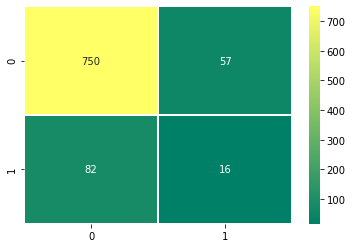

In [6]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=list(test['y']), y_pred=list((pred)))
sns.heatmap(cm, annot=True,fmt="d",linewidths=.5, cmap="summer")
plt.show()

Checking the accuracy, Precision, and recall

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, pred))

Accuracy: 0.8464088397790055
Precision: 0.2191780821917808
Recall: 0.16326530612244897


We can also plot the ROC/AUC to check vizualize the model's performance.The bigger the Area Under the Curve (AUC), the better performance.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

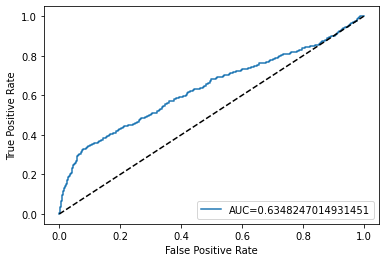

In [8]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

# Be sure to use the cross_val_predict() function to get the scores of all instances in the training set. Using predict or predict_proba will not yield a roc/auc curve later
# Return decision scores -- not predictions
pred = cross_val_predict(model, X_train, y_train, cv = 3, method = "decision_function")
fpr, tpr, thresholds = roc_curve(y_train, pred)
auc = roc_auc_score(y_train, pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0,1], [0,1], "k--") # 45 degree line
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()